# 클러스터링 

In [2]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [3]:
def elbow(x) :
    sse = []
    for i in range(1, 20) :
        km = KMeans(n_clusters=i, init='k-means++', random_state = 0)
        km.fit(x)
        sse.append(km.inertia_)
        
    plt.plot(range(1, 20), sse, marker='o')
    plt.xlabel('클러스터 개수')
    plt.ylabel('sse')
    plt.show()


In [4]:
raw_df = pd.read_csv('final_purchase_data+weather.csv', encoding='cp949')

In [5]:
raw_df.isnull().sum()

고객번호          0
채널구분          0
제휴사코드         0
제휴사세부코드       0
상품코드          0
구매일자          0
구매시간          0
구매금액          0
구매수량          0
성별            0
연령대           0
거주지대분류코드      0
대분류명          0
점포위치코드        0
점포위치세부코드      0
구매수량당_구매금액    0
요일            0
거주_점포일치여부     0
Date          0
평균기온(°C)      0
평균 상대습도(%)    0
일강수량(mm)      0
idx           0
대분류명_code     0
dtype: int64

In [6]:
df = raw_df

In [7]:
df

,고객번호,채널구분,제휴사코드,제휴사세부코드,상품코드,구매일자,구매시간,구매금액,구매수량,성별,...,점포위치세부코드,구매수량당_구매금액,요일,거주_점포일치여부,Date,평균기온(°C),평균 상대습도(%),일강수량(mm),idx,대분류명_code
0,M001444118,1,103,1030260,1156,20210101,18,2650.0,1,0,...,1018,2650.0,4,0,2021-01-01,-4.2,64.0,0.0,365,1
1,M001444118,1,103,1030260,378,20210101,18,5990.0,1,0,...,1018,5990.0,4,0,2021-01-01,-4.2,64.0,0.0,365,1
2,M001444118,1,103,1030260,1160,20210101,18,4990.0,1,0,...,1018,4990.0,4,0,2021-01-01,-4.2,64.0,0.0,365,1
3,M001444118,1,103,1030260,223,20210101,18,1290.0,1,0,...,1018,1290.0,4,0,2021-01-01,-4.2,64.0,0.0,365,2
4,M003827618,1,103,1030295,89,20210101,14,5000.0,1,0,...,1018,5000.0,4,1,2021-01-01,-4.2,64.0,0.0,365,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381738,M744059040,1,102,1020116,318,20211231,14,8480.0,1,0,...,17002,8480.0,4,0,2021-12-31,4.9,62.9,0.0,4744,1
4381739,M744059040,1,102,1020116,395,20211231,14,3800.0,1,0,...,17002,3800.0,4,0,2021-12-31,4.9,62.9,0.0,4744,3
4381740,M803637343,1,102,1020116,1437,20211231,21,1990.0,1,1,...,17002,1990.0,4,0,2021-12-31,4.9,62.9,0.0,4744,1
4381741,M803637343,1,102,1020116,1422,20211231,21,2580.0,2,1,...,17002,1290.0,4,0,2021-12-31,4.9,62.9,0.0,4744,1


### Colab을 활용하여 고객번호별 product_code 분류와 채널 구분 진행

In [8]:
temp_df1 = pd.read_csv('고객번호_대분류.csv')

In [9]:
temp_df = pd.read_csv('채널구분.csv')

### 전처리 및 클러스터링 진행할 데이터프레임(cust_df) 생성

In [10]:
df['sale_amount'] = df['구매금액'] * df['구매수량']

In [11]:
aggregations = {
    'Date' : "max",
    '고객번호' : 'count',
    'sale_amount' : 'sum'
}

In [12]:
cust_df = df.groupby('고객번호').agg(aggregations)
cust_df = cust_df.rename(columns = {'Date' : 'Recency',
                                    '고객번호' : 'Frequency',
                                    'sale_amount' : 'Monetary'}
                        )

In [13]:
demo = pd.read_csv('/Users/anjaeu/Desktop/Contents/롯데 멤버스 공모전/전처리/LPOINT_BIG_COMP_01_DEMO.csv')

In [14]:
demo

,cust,ma_fem_dv,ages,zon_hlv
0,M000034966,여성,40대,Z07
1,M000059535,여성,30대,Z12
2,M000136117,여성,30대,Z11
3,M000201112,여성,50대,Z17
4,M000225114,여성,40대,Z17
...,...,...,...,...
29908,M999708287,여성,40대,Z10
29909,M999770689,여성,30대,Z16
29910,M999849895,여성,20대,Z04
29911,M999926092,남성,30대,Z08


In [15]:
for i in range(len(demo['ma_fem_dv'])) :
    if demo['ma_fem_dv'][i] == '여성' :
        demo['ma_fem_dv'][i] = 1 
    else :
        demo['ma_fem_dv'][i] = 0

In [16]:
demo['ages'] = demo['ages'].replace("대", "",regex=True).astype(int)

In [17]:
demo.columns = ['고객번호', '성별', '연령대', 'zon_hlv']
demo = demo[['고객번호', '성별', '연령대']]

In [18]:
demo

,고객번호,성별,연령대
0,M000034966,1,40
1,M000059535,1,30
2,M000136117,1,30
3,M000201112,1,50
4,M000225114,1,40
...,...,...,...
29908,M999708287,1,40
29909,M999770689,1,30
29910,M999849895,1,20
29911,M999926092,0,30


In [19]:
cust_df = cust_df.reset_index()
cust_df['Recency'] = pd.to_datetime(cust_df['Recency'])
cust_df.head(3)

,고객번호,Recency,Frequency,Monetary
0,M000034966,2021-12-23,51,783300.0
1,M000136117,2021-12-30,109,27452630.0
2,M000201112,2021-11-28,21,94229.0


In [20]:
cust_df

,고객번호,Recency,Frequency,Monetary
0,M000034966,2021-12-23,51,783300.0
1,M000136117,2021-12-30,109,27452630.0
2,M000201112,2021-11-28,21,94229.0
3,M000225114,2021-12-31,159,2048440.0
4,M000261625,2021-12-04,67,6496700.0
...,...,...,...,...
26912,M999599111,2021-11-14,34,1550082.0
26913,M999673157,2021-12-18,24,2869290.0
26914,M999770689,2021-12-31,315,1535240.0
26915,M999849895,2021-12-01,72,2573792.0


In [21]:
cust_df = pd.merge(cust_df, demo, on='고객번호', how='inner')

In [22]:
cust_df = pd.merge(cust_df, temp_df, on='고객번호', how='inner')

In [23]:
cust_df = pd.merge(cust_df, temp_df1, on='고객번호', how='inner')

In [24]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26917 entries, 0 to 26916
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   고객번호       26917 non-null  object        
 1   Recency    26917 non-null  datetime64[ns]
 2   Frequency  26917 non-null  int64         
 3   Monetary   26917 non-null  float64       
 4   성별         26917 non-null  object        
 5   연령대        26917 non-null  int64         
 6   채널구분       26917 non-null  int64         
 7   대분류명_mode  26917 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 1.8+ MB


In [25]:
import datetime as dt

cust_df['Recency'] = dt.datetime(2022,1,1) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days+1)

cust_df.head(3)

,고객번호,Recency,Frequency,Monetary,성별,연령대,채널구분,대분류명_mode
0,M000034966,10,51,783300.0,1,40,1,1
1,M000136117,3,109,27452630.0,1,30,1,6
2,M000201112,35,21,94229.0,1,50,1,2


In [26]:
print(cust_df.shape)

(26917, 8)


In [27]:
cust_df.columns = ['고객번호', 'Recency', 'Frequency', 'Monetary', '성별', '연령대', '채널구분', 'product_code']

In [28]:
cust_df

,고객번호,Recency,Frequency,Monetary,성별,연령대,채널구분,product_code
0,M000034966,10,51,783300.0,1,40,1,1
1,M000136117,3,109,27452630.0,1,30,1,6
2,M000201112,35,21,94229.0,1,50,1,2
3,M000225114,2,159,2048440.0,1,40,1,1
4,M000261625,29,67,6496700.0,1,40,1,4
...,...,...,...,...,...,...,...,...
26912,M999599111,49,34,1550082.0,1,40,1,1
26913,M999673157,15,24,2869290.0,0,30,1,2
26914,M999770689,2,315,1535240.0,1,30,1,1
26915,M999849895,32,72,2573792.0,1,20,1,1


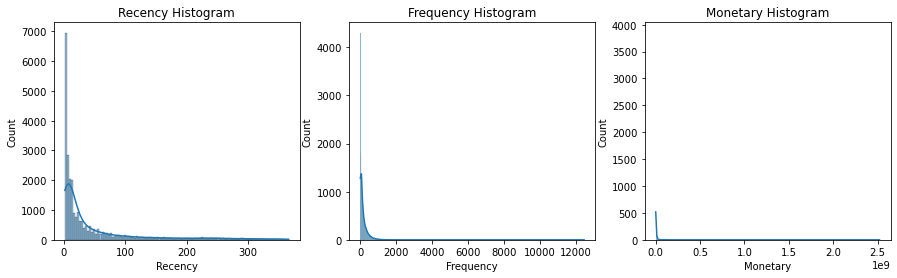

In [29]:
fig, axs = plt.subplots(1,3, figsize=(15,4))

sns.histplot(cust_df['Recency'], kde=True, ax=axs[0])
axs[0].set_title('Recency Histogram')

sns.histplot(cust_df['Frequency'], kde=True, ax=axs[1])
axs[1].set_title('Frequency Histogram')

sns.histplot(cust_df['Monetary'], kde=True, ax=axs[2])
axs[2].set_title('Monetary Histogram')

plt.show()

/Users/anjaeu/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anjaeu/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anjaeu/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anjaeu/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47161 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anjaeu/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anjaeu/opt/anaconda3/lib/python3.9/site-packages/matp

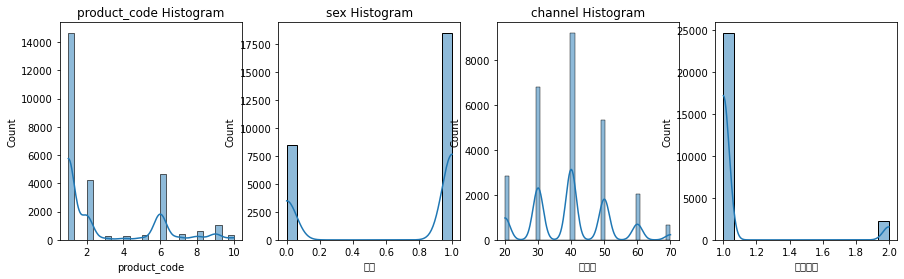

In [30]:
fig, axs = plt.subplots(1,4, figsize=(15,4))

sns.histplot(cust_df['product_code'], kde=True, ax=axs[0])
axs[0].set_title('product_code Histogram')

sns.histplot(cust_df['성별'], kde=True, ax=axs[1])
axs[1].set_title('sex Histogram')

sns.histplot(cust_df['연령대'], kde=True, ax=axs[2])
axs[2].set_title('age Histogram')

sns.histplot(cust_df['채널구분'], kde=True, ax=axs[3])
axs[2].set_title('channel Histogram')

plt.show()

In [31]:
cust_df['성별'] = cust_df['성별'].astype(int)

In [32]:
cust_df.describe()

,Recency,Frequency,Monetary,성별,연령대,채널구분,product_code
count,26917.000000,26917.000000,2.691700e+04,26917.000000,26917.000000,26917.000000,26917.000000
mean,49.636326,162.787198,5.430876e+06,0.686741,39.599881,1.082662,2.817216
std,76.171541,227.442772,2.868911e+07,0.463827,11.849653,0.275375,2.615505
min,2.000000,1.000000,1.000000e+01,0.000000,20.000000,1.000000,1.000000
25%,5.000000,30.000000,5.929000e+05,0.000000,30.000000,1.000000,1.000000
50%,15.000000,88.000000,1.790770e+06,1.000000,40.000000,1.000000,1.000000
75%,55.000000,214.000000,4.392710e+06,1.000000,50.000000,1.000000,6.000000
max,366.000000,12448.000000,2.521298e+09,1.000000,70.000000,2.000000,10.000000


# 실루엣 계수 시각화 함수

In [33]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

# 군집갯수별 시각화 함수

In [34]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)
    
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    print(cluster_lists)
    plt.show()

# elbow

In [35]:
cust_df_ =  cust_df[['Recency', 'Frequency', 'Monetary', 'product_code', 
                     '성별', '연령대', '채널구분']]

/Users/anjaeu/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anjaeu/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47084 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anjaeu/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anjaeu/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anjaeu/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anjaeu/opt/anaconda3/lib/python3.9/site-packages/matp

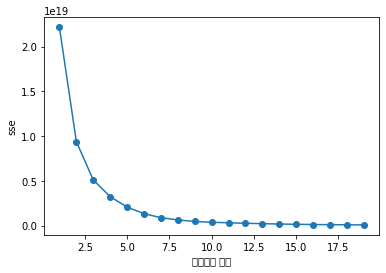

In [36]:
elbow(cust_df_)

# StandardScalerPermalink

In [37]:
cust_df

,고객번호,Recency,Frequency,Monetary,성별,연령대,채널구분,product_code
0,M000034966,10,51,783300.0,1,40,1,1
1,M000136117,3,109,27452630.0,1,30,1,6
2,M000201112,35,21,94229.0,1,50,1,2
3,M000225114,2,159,2048440.0,1,40,1,1
4,M000261625,29,67,6496700.0,1,40,1,4
...,...,...,...,...,...,...,...,...
26912,M999599111,49,34,1550082.0,1,40,1,1
26913,M999673157,15,24,2869290.0,0,30,1,2
26914,M999770689,2,315,1535240.0,1,30,1,1
26915,M999849895,32,72,2573792.0,1,20,1,1


In [38]:
# StandardScaler
X_features = cust_df[['Recency','Frequency','Monetary','연령대']].values

X_features_scaled = StandardScaler().fit_transform(X_features)

# KMeans
kmeans = KMeans(n_clusters=5, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df["cluster_label"] = labels

# 실루엣 스코어
silhouette_kmeans = silhouette_score(X_features_scaled, labels)
print(f"실루엣 스코어: {silhouette_kmeans:.3f}")

실루엣 스코어: 0.394


/Users/anjaeu/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anjaeu/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47084 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anjaeu/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anjaeu/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anjaeu/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anjaeu/opt/anaconda3/lib/python3.9/site-packages/matp

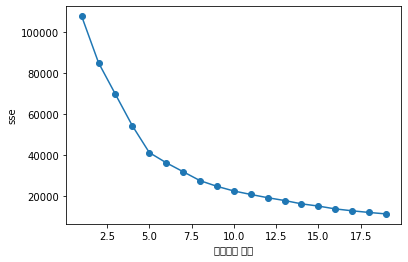

In [39]:
elbow(X_features_scaled)

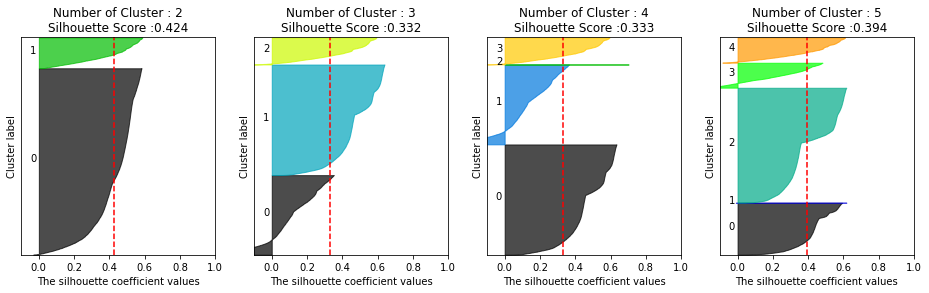

In [40]:
visualize_silhouette([2,3,4,5],X_features_scaled)

/var/folders/7n/qbcvswc55hzd4lnphhs0grb40000gn/T/ipykernel_4557/1217247847.py:37: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
/var/folders/7n/qbcvswc55hzd4lnphhs0grb40000gn/T/ipykernel_4557/1217247847.py:37: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\


[2, 3, 4, 5]


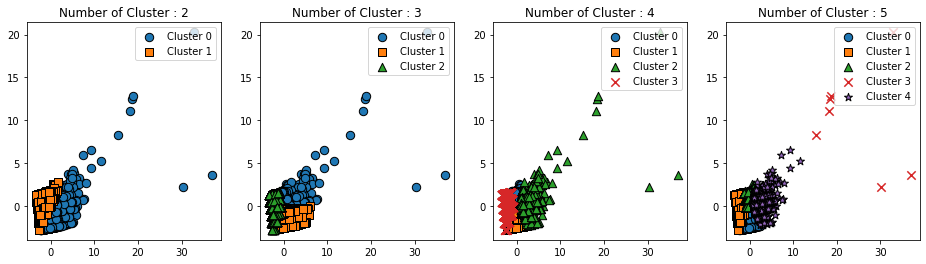

In [41]:
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

# 로그 변환

In [42]:
# 로그 변환
cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Frequency'])
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])
cust_df['product_code_log'] = np.log1p(cust_df['product_code'])
cust_df['성별_log'] = np.log1p(cust_df['성별'])
cust_df['연령대_log'] = np.log1p(cust_df['연령대'])

# StandardScaler
X_features = cust_df[['Recency_log','Frequency_log','Monetary_log','연령대']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

# KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df["cluster_label"] = labels

# 실루엣 스코어
silhouette_kmeans = silhouette_score(X_features_scaled, labels)
print(f"실루엣 스코어: {silhouette_kmeans:.3f}")

실루엣 스코어: 0.253


/Users/anjaeu/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anjaeu/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47084 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anjaeu/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anjaeu/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anjaeu/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 44060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/anjaeu/opt/anaconda3/lib/python3.9/site-packages/matp

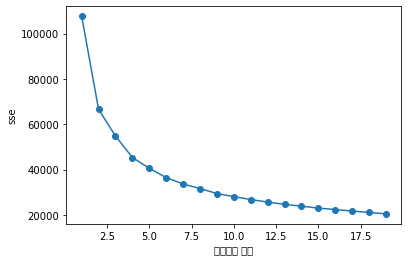

In [43]:
elbow(X_features_scaled)

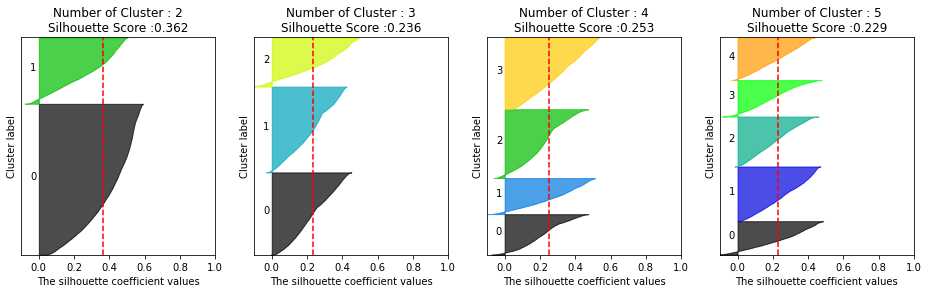

In [44]:
visualize_silhouette([2,3,4,5],X_features_scaled)

/var/folders/7n/qbcvswc55hzd4lnphhs0grb40000gn/T/ipykernel_4557/1217247847.py:37: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
/var/folders/7n/qbcvswc55hzd4lnphhs0grb40000gn/T/ipykernel_4557/1217247847.py:37: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\


[2, 3, 4, 5]


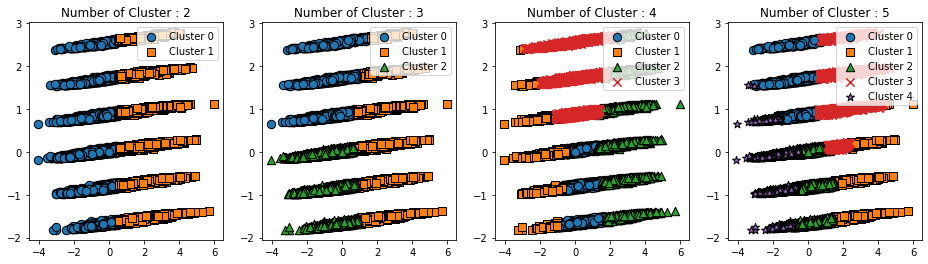

In [45]:
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

In [47]:
cust_df['product_code'].value_counts()

1     14666
6      4653
2      4263
9      1056
8       609
7       448
10      371
5       345
4       256
3       250
Name: product_code, dtype: int64

In [48]:
cust_df.groupby('cluster_label').mean()

,Recency,Frequency,Monetary,성별,연령대,채널구분,product_code,Recency_log,Frequency_log,Monetary_log,product_code_log,성별_log,연령대_log
cluster_label,,,,,,,,,,,,,
0,33.649165,116.148170,3.351573e+06,0.715394,55.423628,1.035004,2.504972,2.927119,4.342923,14.332592,1.074060,0.495873,4.025787
1,164.984543,7.472222,2.332561e+05,0.604167,38.608871,1.178315,4.423163,4.823455,1.736482,11.526508,1.528499,0.418776,3.623404
2,43.317862,84.915729,2.218653e+06,0.681669,32.063994,1.075012,3.037037,3.267750,4.137601,14.075932,1.199743,0.472497,3.470148
3,6.836163,341.829866,1.229736e+07,0.716856,38.380749,1.068931,1.976723,1.813972,5.575999,15.548065,0.945823,0.496887,3.650647


In [49]:
str = 'cluster_label == 0'

result_df = cust_df.query(str)

In [50]:
result_df.groupby('product_code').count()

,고객번호,Recency,Frequency,Monetary,성별,연령대,채널구분,cluster_label,Recency_log,Frequency_log,Monetary_log,product_code_log,성별_log,연령대_log
product_code,,,,,,,,,,,,,,
1,3164,3164,3164,3164,3164,3164,3164,3164,3164,3164,3164,3164,3164,3164
2,533,533,533,533,533,533,533,533,533,533,533,533,533,533
3,42,42,42,42,42,42,42,42,42,42,42,42,42,42
4,30,30,30,30,30,30,30,30,30,30,30,30,30,30
5,73,73,73,73,73,73,73,73,73,73,73,73,73,73
6,938,938,938,938,938,938,938,938,938,938,938,938,938,938
7,36,36,36,36,36,36,36,36,36,36,36,36,36,36
8,64,64,64,64,64,64,64,64,64,64,64,64,64,64
9,118,118,118,118,118,118,118,118,118,118,118,118,118,118


In [51]:
str = 'cluster_label == 1'

result_df = cust_df.query(str)
result_df.groupby('product_code').count()

,고객번호,Recency,Frequency,Monetary,성별,연령대,채널구분,cluster_label,Recency_log,Frequency_log,Monetary_log,product_code_log,성별_log,연령대_log
product_code,,,,,,,,,,,,,,
1,1034,1034,1034,1034,1034,1034,1034,1034,1034,1034,1034,1034,1034,1034
2,814,814,814,814,814,814,814,814,814,814,814,814,814,814
3,137,137,137,137,137,137,137,137,137,137,137,137,137,137
4,160,160,160,160,160,160,160,160,160,160,160,160,160,160
5,182,182,182,182,182,182,182,182,182,182,182,182,182,182
6,1072,1072,1072,1072,1072,1072,1072,1072,1072,1072,1072,1072,1072,1072
7,344,344,344,344,344,344,344,344,344,344,344,344,344,344
8,306,306,306,306,306,306,306,306,306,306,306,306,306,306
9,316,316,316,316,316,316,316,316,316,316,316,316,316,316


In [52]:
str = 'cluster_label == 2'

result_df = cust_df.query(str)
result_df.groupby('product_code').count()

,고객번호,Recency,Frequency,Monetary,성별,연령대,채널구분,cluster_label,Recency_log,Frequency_log,Monetary_log,product_code_log,성별_log,연령대_log
product_code,,,,,,,,,,,,,,
1,4069,4069,4069,4069,4069,4069,4069,4069,4069,4069,4069,4069,4069,4069
2,1785,1785,1785,1785,1785,1785,1785,1785,1785,1785,1785,1785,1785,1785
3,48,48,48,48,48,48,48,48,48,48,48,48,48,48
4,52,52,52,52,52,52,52,52,52,52,52,52,52,52
5,65,65,65,65,65,65,65,65,65,65,65,65,65,65
6,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643
7,53,53,53,53,53,53,53,53,53,53,53,53,53,53
8,181,181,181,181,181,181,181,181,181,181,181,181,181,181
9,441,441,441,441,441,441,441,441,441,441,441,441,441,441


In [53]:
str = 'cluster_label == 3'

result_df = cust_df.query(str)
result_df.groupby('product_code').count()

,고객번호,Recency,Frequency,Monetary,성별,연령대,채널구분,cluster_label,Recency_log,Frequency_log,Monetary_log,product_code_log,성별_log,연령대_log
product_code,,,,,,,,,,,,,,
1,6399,6399,6399,6399,6399,6399,6399,6399,6399,6399,6399,6399,6399,6399
2,1131,1131,1131,1131,1131,1131,1131,1131,1131,1131,1131,1131,1131,1131
3,23,23,23,23,23,23,23,23,23,23,23,23,23,23
4,14,14,14,14,14,14,14,14,14,14,14,14,14,14
5,25,25,25,25,25,25,25,25,25,25,25,25,25,25
6,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
7,15,15,15,15,15,15,15,15,15,15,15,15,15,15
8,58,58,58,58,58,58,58,58,58,58,58,58,58,58
9,181,181,181,181,181,181,181,181,181,181,181,181,181,181


In [54]:
str = 'cluster_label == 4'

result_df = cust_df.query(str)
result_df.groupby('product_code').count()

,고객번호,Recency,Frequency,Monetary,성별,연령대,채널구분,cluster_label,Recency_log,Frequency_log,Monetary_log,product_code_log,성별_log,연령대_log
product_code,,,,,,,,,,,,,,


In [55]:
result_df.corr()

,Recency,Frequency,Monetary,성별,연령대,채널구분,product_code,cluster_label,Recency_log,Frequency_log,Monetary_log,product_code_log,성별_log,연령대_log
Recency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frequency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Monetary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
성별,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
연령대,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
채널구분,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cluster_label,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency_log,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frequency_log,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cust_df.to_csv('final_clustered_df.csv', index=False)